In [ ]:
# Install Pendukung
!pip install scikit-fuzzy

In [ ]:
# Metode Mamdani
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
# Definisikan Semesta
jam_tdrSiang=ctrl.Antecedent(np.arange(-1,7,1),'Tidur Siang')
jam_tdrMalam=ctrl.Antecedent(np.arange(0,9,1),\
                          'Tidur Malam')
tingkat_keceriaan=ctrl.Consequent(np.arange(0,10,1),\
                          'Tingkat Keceriaan')

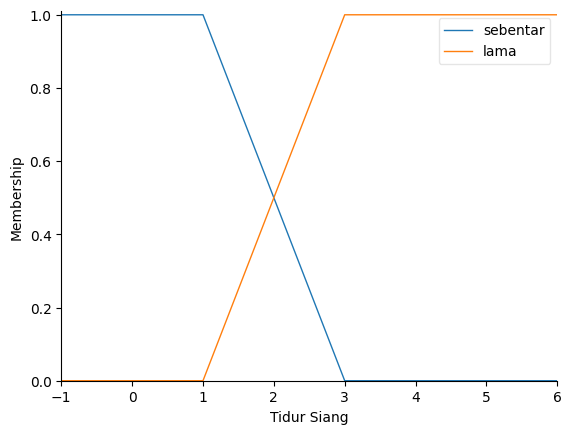

In [ ]:
# Tidur Siang
jam_tdrSiang['sebentar']=fuzz.trapmf(jam_tdrSiang.universe,\
                               [-1,-1,1,3])
jam_tdrSiang['lama']=fuzz.trapmf(jam_tdrSiang.universe,\
                               [1,3,7,10])
jam_tdrSiang.view()

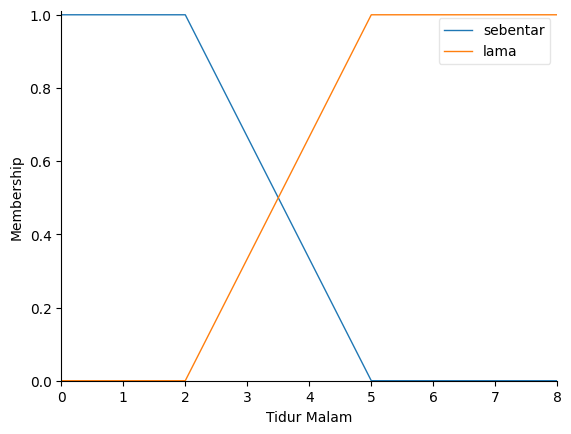

In [ ]:
# Tidur Malam
jam_tdrMalam['sebentar']=fuzz.trapmf(jam_tdrMalam.universe,\
                               [0,0,2,5])
jam_tdrMalam['lama']=fuzz.trapmf(jam_tdrMalam.universe,\
                               [2,5,12,15])
jam_tdrMalam.view()

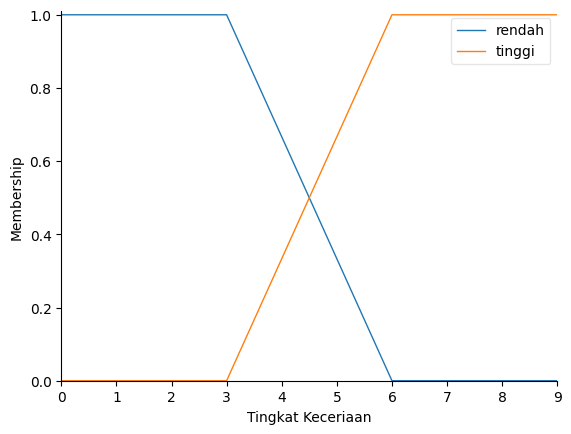

In [ ]:
# Tingkat Keceriaan
tingkat_keceriaan['rendah']=fuzz.trapmf(tingkat_keceriaan.universe,\
                               [0,0,3,6])
tingkat_keceriaan['tinggi']=fuzz.trapmf(tingkat_keceriaan.universe,\
                               [3,6,10,12])
tingkat_keceriaan.view()

In [ ]:
# Rule yang digunakan
rules1=ctrl.Rule(jam_tdrSiang['sebentar'] & jam_tdrMalam['sebentar'],\
                tingkat_keceriaan['rendah'])
rules2=ctrl.Rule(jam_tdrSiang['sebentar'] & jam_tdrMalam['lama'],\
                tingkat_keceriaan['tinggi'])
rules3=ctrl.Rule(jam_tdrSiang['lama'] & jam_tdrMalam['sebentar'],\
                tingkat_keceriaan['rendah'])
rules4=ctrl.Rule(jam_tdrSiang['lama'] & jam_tdrMalam['lama'],\
                tingkat_keceriaan['tinggi'])

In [ ]:
# Masukkan Rule ke system Fuzzy
keceriaan_ctrl=ctrl.ControlSystem([rules1,rules2,rules3,rules4])

In [ ]:
# Persiapan Simulasi Fuzzy Mamdani
simulasi_tingkat_keceriaan=ctrl.ControlSystemSimulation(\
                            keceriaan_ctrl)

Tingkat Keceriaan adalah  49.43223443223444  %


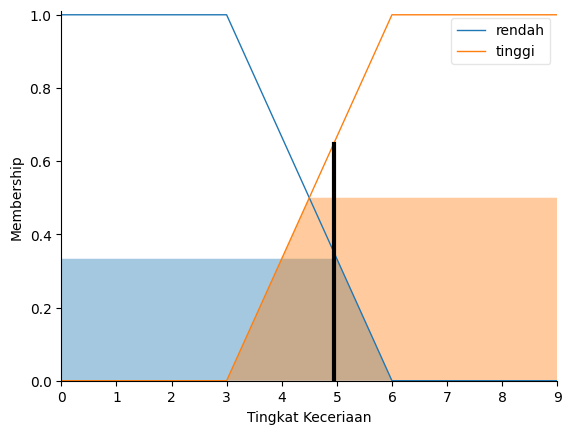

In [ ]:
# Inputan Fuzzi Mamdani
simulasi_tingkat_keceriaan.input['Tidur Siang']=2
simulasi_tingkat_keceriaan.input['Tidur Malam']=4
simulasi_tingkat_keceriaan.compute()

print("Tingkat Keceriaan adalah ",\
      simulasi_tingkat_keceriaan.output['Tingkat Keceriaan']*10,\
      " %")
tingkat_keceriaan.view(sim=simulasi_tingkat_keceriaan)